# Week 8 Practice

## Black-Scholes Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

###  European Options

Non-Dividend Paying Options

In [2]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [3]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [4]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

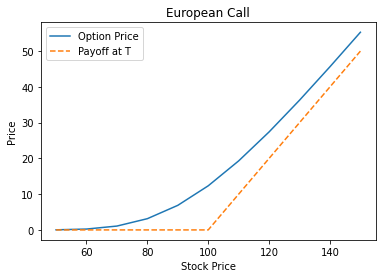

In [5]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Dividend Paying Options

In [6]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0)
    
    return option_value

In [7]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

12.267031716000652

In [8]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

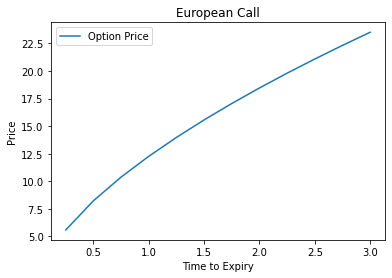

In [9]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

### Option Trading

Has Black Scholes correctly predicted the market value of the options?

In [10]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2020-12-11')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL201211C00065000,2020-11-03 15:47:47,65.0,45.95,53.70,53.90,0.000000,0.000000,NaN,NaN,0.876954,True,REGULAR,USD
1,AAPL201211C00070000,2020-11-02 20:08:38,70.0,38.01,48.65,48.90,0.000000,0.000000,NaN,NaN,0.751956,True,REGULAR,USD
2,AAPL201211C00075000,2020-11-04 18:09:44,75.0,43.90,43.70,43.95,0.000000,0.000000,1.0,0.0,0.707034,True,REGULAR,USD
3,AAPL201211C00085000,2020-11-05 19:43:30,85.0,34.20,33.80,34.00,0.000000,0.000000,1.0,1.0,0.574223,True,REGULAR,USD
4,AAPL201211C00090000,2020-11-04 16:12:57,90.0,24.23,28.80,29.10,0.000000,0.000000,104.0,104.0,0.508794,True,REGULAR,USD
5,AAPL201211C00095000,2020-11-04 14:31:45,95.0,19.40,23.95,24.20,0.000000,0.000000,NaN,NaN,0.490239,True,REGULAR,USD
6,AAPL201211C00096000,2020-11-03 14:37:18,96.0,14.75,23.00,23.25,0.000000,0.000000,NaN,NaN,0.482671,True,REGULAR,USD
7,AAPL201211C00098000,2020-11-04 15:44:41,98.0,17.20,21.10,21.30,0.000000,0.000000,NaN,NaN,0.455084,True,REGULAR,USD
8,AAPL201211C00099000,2020-11-02 20:59:51,99.0,11.70,20.10,20.35,0.000000,0.000000,NaN,NaN,0.445562,True,REGULAR,USD
9,AAPL201211C00099500,2020-11-06 14:30:00,99.5,18.62,19.65,19.85,5.620001,43.230774,1.0,20.0,0.436041,True,REGULAR,USD


In [11]:
data = yf.download("AAPL", start="2019-11-09", end="2020-11-08")

[*********************100%***********************]  1 of 1 completed


In [12]:
data['Adj Close']

Date
2019-11-11     64.988770
2019-11-12     64.929268
2019-11-13     65.551399
2019-11-14     65.097816
2019-11-15     65.871140
                 ...    
2020-11-02    108.582664
2020-11-03    110.249794
2020-11-04    114.752022
2020-11-05    118.824997
2020-11-06    118.690002
Name: Adj Close, Length: 251, dtype: float64

In [13]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1/12
r = 0.0083
q = 0.0069
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(len(data)) * log_return.std() 
vol

0.4613362242285797

In [14]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [15]:
opt.calls['BSMPrice'] = pd.DataFrame(data = AAPL_bsm_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL201211C00065000,2020-11-03 15:47:47,65.0,45.95,53.70,53.90,0.000000,0.000000,NaN,NaN,0.876954,True,REGULAR,USD,53.734952
1,AAPL201211C00070000,2020-11-02 20:08:38,70.0,38.01,48.65,48.90,0.000000,0.000000,NaN,NaN,0.751956,True,REGULAR,USD,48.738501
2,AAPL201211C00075000,2020-11-04 18:09:44,75.0,43.90,43.70,43.95,0.000000,0.000000,1.0,0.0,0.707034,True,REGULAR,USD,43.742746
3,AAPL201211C00085000,2020-11-05 19:43:30,85.0,34.20,33.80,34.00,0.000000,0.000000,1.0,1.0,0.574223,True,REGULAR,USD,33.774533
4,AAPL201211C00090000,2020-11-04 16:12:57,90.0,24.23,28.80,29.10,0.000000,0.000000,104.0,104.0,0.508794,True,REGULAR,USD,28.845347
5,AAPL201211C00095000,2020-11-04 14:31:45,95.0,19.40,23.95,24.20,0.000000,0.000000,NaN,NaN,0.490239,True,REGULAR,USD,24.028630
6,AAPL201211C00096000,2020-11-03 14:37:18,96.0,14.75,23.00,23.25,0.000000,0.000000,NaN,NaN,0.482671,True,REGULAR,USD,23.087420
7,AAPL201211C00098000,2020-11-04 15:44:41,98.0,17.20,21.10,21.30,0.000000,0.000000,NaN,NaN,0.455084,True,REGULAR,USD,21.235032
8,AAPL201211C00099000,2020-11-02 20:59:51,99.0,11.70,20.10,20.35,0.000000,0.000000,NaN,NaN,0.445562,True,REGULAR,USD,20.326041
9,AAPL201211C00099500,2020-11-06 14:30:00,99.5,18.62,19.65,19.85,5.620001,43.230774,1.0,20.0,0.436041,True,REGULAR,USD,19.876341


In [16]:
opt.calls['estimate_error'] = ((opt.calls['ask'] - opt.calls['BSMPrice'])/opt.calls['BSMPrice'])*100
opt.calls['estimate_error']

0       0.307151
1       0.331358
2       0.473802
3       0.667564
4       0.882822
5       0.713191
6       0.704192
7       0.305949
8       0.117873
9      -0.132524
10     -0.154550
11     -1.068300
12     -1.026837
13     -1.671941
14     -1.867820
15     -2.534818
16     -3.409851
17     -4.899659
18     -5.171402
19     -6.887904
20     -8.134326
21     -9.280773
22    -10.799373
23    -11.174048
24    -12.984864
25    -14.719850
26    -16.345989
27    -18.517185
28    -20.588262
29    -22.506671
30    -26.818465
31    -27.480354
32    -30.652909
33    -32.529687
34    -36.316275
35    -38.811367
36    -41.577564
37    -44.936459
38    -51.387540
39    -58.208585
40    -60.886023
41    -55.172876
42    -40.317276
43     10.781071
44     49.228922
45    143.448390
Name: estimate_error, dtype: float64

In [17]:
opt.calls['estimate_error'].describe()

count     46.000000
mean     -11.108914
std       31.389455
min      -60.886023
25%      -27.314881
50%       -7.511115
75%        0.055274
max      143.448390
Name: estimate_error, dtype: float64

Our mean estimation error is -11.10%, with a standard deviation of 31.38% points. Our median is even more promising at around -7.51%. Our standard deviation still seems a bit high.

Text(0.5, 1.0, 'Histogram of Estimate Error')

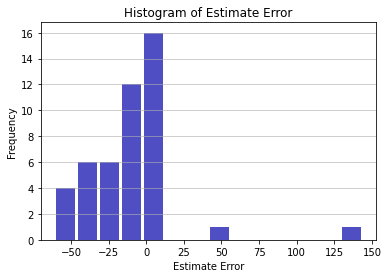

In [18]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

### Mibian - Options Pricing Library

MibianLib is an open source python library for options pricing. You can use it to calculate the price, the implied volatility, the greeks or the put/call parity of an option using the Black-Scholes(-Merton) pricing models.

In [19]:
pip install mibian

Note: you may need to restart the kernel to use updated packages.


In [20]:
import mibian as mb

In [21]:
option_100 = mb.BS([S, 100, r*100, 30], volatility = vol*100)

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [22]:
option_100.callPrice

19.41208018091443

In [23]:
option_100d = mb.Me([S, 100, r*100, q*100, 30], volatility = vol*100)

# Used for pricing European options on stocks with dividends
# Me([underlyingPrice, strikePrice, interestRate, annualDividends, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [24]:
option_100d.callPrice

19.36026478068102

In [25]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 30], volatility = vol*100).callPrice

In [26]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(data = AAPL_mb_bsm_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL201211C00065000,2020-11-03 15:47:47,65.0,45.95,53.70,53.90,0.000000,0.000000,NaN,NaN,0.876954,True,REGULAR,USD,53.734952,0.307151,53.677637
1,AAPL201211C00070000,2020-11-02 20:08:38,70.0,38.01,48.65,48.90,0.000000,0.000000,NaN,NaN,0.751956,True,REGULAR,USD,48.738501,0.331358,48.681129
2,AAPL201211C00075000,2020-11-04 18:09:44,75.0,43.90,43.70,43.95,0.000000,0.000000,1.0,0.0,0.707034,True,REGULAR,USD,43.742746,0.473802,43.685263
3,AAPL201211C00085000,2020-11-05 19:43:30,85.0,34.20,33.80,34.00,0.000000,0.000000,1.0,1.0,0.574223,True,REGULAR,USD,33.774533,0.667564,33.715781
4,AAPL201211C00090000,2020-11-04 16:12:57,90.0,24.23,28.80,29.10,0.000000,0.000000,104.0,104.0,0.508794,True,REGULAR,USD,28.845347,0.882822,28.784451
5,AAPL201211C00095000,2020-11-04 14:31:45,95.0,19.40,23.95,24.20,0.000000,0.000000,NaN,NaN,0.490239,True,REGULAR,USD,24.028630,0.713191,23.963961
6,AAPL201211C00096000,2020-11-03 14:37:18,96.0,14.75,23.00,23.25,0.000000,0.000000,NaN,NaN,0.482671,True,REGULAR,USD,23.087420,0.704192,23.021810
7,AAPL201211C00098000,2020-11-04 15:44:41,98.0,17.20,21.10,21.30,0.000000,0.000000,NaN,NaN,0.455084,True,REGULAR,USD,21.235032,0.305949,21.167400
8,AAPL201211C00099000,2020-11-02 20:59:51,99.0,11.70,20.10,20.35,0.000000,0.000000,NaN,NaN,0.445562,True,REGULAR,USD,20.326041,0.117873,20.257351
9,AAPL201211C00099500,2020-11-06 14:30:00,99.5,18.62,19.65,19.85,5.620001,43.230774,1.0,20.0,0.436041,True,REGULAR,USD,19.876341,-0.132524,19.807115


In [27]:
opt.calls['estimate_error_mb'] = ((opt.calls['ask'] - opt.calls['MB_BSMPrice'])/opt.calls['MB_BSMPrice'])*100
opt.calls['estimate_error_mb']

0       0.414256
1       0.449601
2       0.606009
3       0.842985
4       1.096246
5       0.984973
6       0.991191
7       0.626433
8       0.457359
9       0.216514
10      0.205241
11     -0.689006
12     -0.622721
13     -1.244018
14     -1.412336
15     -2.052110
16     -2.899268
17     -4.363033
18     -4.600216
19     -6.289318
20     -7.504190
21     -8.617074
22    -10.103681
23    -10.435950
24    -12.215013
25    -13.917094
26    -15.508832
27    -17.651002
28    -19.692329
29    -21.579603
30    -25.890985
31    -26.507595
32    -29.669327
33    -31.518783
34    -35.309292
35    -37.791269
36    -40.551648
37    -43.918939
38    -50.346605
39    -57.084911
40    -59.592390
41    -53.382428
42    -37.484809
43     16.939713
44     58.825973
45    161.361693
Name: estimate_error_mb, dtype: float64

In [28]:
opt.calls['estimate_error_mb'].describe()

count     46.000000
mean      -9.704948
std       33.578767
min      -59.592390
25%      -26.353443
50%       -6.896754
75%        0.364821
max      161.361693
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

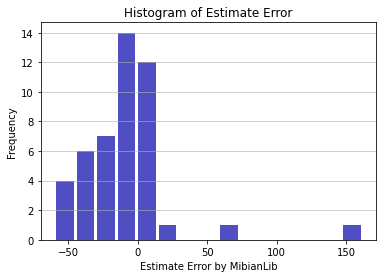

In [29]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

Although the mean and median estimation of error have decreased, the standard deviation has increased. Overall, the results is consistent.